<a href="https://colab.research.google.com/github/rrhkwk123/Work/blob/main/Unpopular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the stuff
import pandas as pd
import altair as alt
import matplotlib as plt
songs = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/spotify/data.csv')

from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as py



In [ ]:
#make the dataset small enough to work with
songs = songs.drop(['id', 'name', 'release_date', 'explicit', 'liveness', 'loudness', 'valence', 'speechiness', 'loudness', 'artists'], axis=1)
songs = songs[songs['popularity'] != 0]

In [ ]:
#scale features
scaler = MinMaxScaler()
scale_songs = scaler.fit_transform(songs)

In [ ]:
#make the data
targ = songs['popularity'].values
X = pd.get_dummies(songs.drop(columns=['popularity']), drop_first=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, targ, test_size=0.30, random_state=1)


In [ ]:
#train
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train,Y_train)



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [ ]:
#test
knn.predict(X_test)

array([33.83333333, 25.83333333, 34.5       , ..., 25.33333333,
       50.16666667, 26.66666667])

In [ ]:
#results
knn.score(X_test, Y_test)

0.43339587144355035

In [ ]:
#shortcut for best k value
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsRegressor()

param_grid = {'n_neighbors': py.arange(1,15)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=20)

knn_gscv.fit(X_train, Y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 6}

In [ ]:
#test set isolates categories to see prediction
test_set = pd.DataFrame({'acousticness':[.5,0,0,0,0,0,0,0,0], 'danceability':[0,.5,0,0,0,0,0,0,0], 'duration_ms':[0,0,300000,0,0,0,0,0,0],
                         'energy':[0,0,0,.5,0,0,0,0,0], 'instrumentalness':[0,0,0,0,.5,0,0,0,0], 'key':[0,0,0,0,0,5,0,0,0],
                         'mode':[0,0,0,0,0,0,1,0,0], 'tempo':[0,0,0,0,0,0,0,100,0], 'year':[0,0,0,0,0,0,0,0,1980], })


In [ ]:
#results of test set
results = knn.predict(test_set)

[Text(0, 0, 'acousticness'),
 Text(0, 0, 'danceability'),
 Text(0, 0, 'duration_ms'),
 Text(0, 0, 'energy'),
 Text(0, 0, 'instrumentalness'),
 Text(0, 0, 'key'),
 Text(0, 0, 'mode'),
 Text(0, 0, 'tempo'),
 Text(0, 0, 'year')]

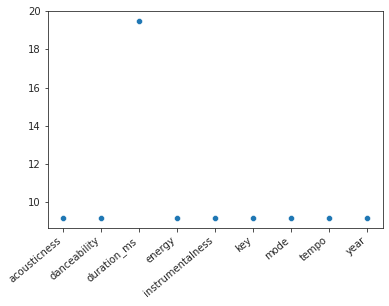

In [ ]:


fig = sns.scatterplot(x=['acousticness', 'danceability', 'duration_ms','energy','instrumentalness', 'key', 'mode', 'tempo', 'year' ], y=results)
fig.set_xticklabels(['acousticness', 'danceability', 'duration_ms','energy','instrumentalness', 'key', 'mode', 'tempo', 'year' ], rotation=40, ha="right")


